In [39]:
#%matplotlib

In [2]:
import pandas as pd
import numpy as np
import os
import json
import requests
import time
from scipy.stats import linregress
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import warnings
warnings.filterwarnings('ignore')

In [3]:
combined_data_csv = os.path.join("..", "data", "cleandata", "coll_n_weather_chris_stan_date_left_merge_period_intervals.csv")

csv = pd.read_csv(combined_data_csv, low_memory=False)

In [4]:
combined_data_df = pd.DataFrame(csv)
combined_data_df.head(2)

,DATE,Year / Month,Year / Week,UNIX DATE,Week,MONTH,YEAR,DEATHS,INJURIES,Corrected Year for Year / Week,...,precipProbability,pressure,temperatureMax,temperatureMaxTime,temperatureMin,temperatureMinTime,visibility,windGust,windGustTime,windSpeed
0,2013-12-31,2013/12,2013/1,1388483880,1,12,2013,0.0,0.0,2014,...,0.0,1021.22,31.36,1388520000,20.95,1388491200,9.97,15.22,1388534400,2.76
1,2013-12-31,2013/12,2013/1,1388483640,1,12,2013,0.0,0.0,2014,...,0.0,1021.22,31.36,1388520000,20.95,1388491200,9.97,15.22,1388534400,2.76


In [5]:
len(combined_data_df)

1116399

In [6]:
combined_data_df['Corrected Year / Week'][1116398]

'2019/1'

In [7]:
#combined_data_df=combined_data_df.sort_values('Corrected Year / Week', ascending=True)
#combined_data_df.head(1000)

In [8]:
#combined_data_df[corrected_year_week] = np.where(combined_data_df[Month]=12)

In [9]:
#combined_data_df.to_csv("../data/Chris/combined_data_with_period_intervals.csv", index = False, header = True)

In [10]:
combined_data_df.columns

Index(['DATE', 'Year / Month', 'Year / Week', 'UNIX DATE', 'Week', 'MONTH',
       'YEAR', 'DEATHS', 'INJURIES', 'Corrected Year for Year / Week',
       'Corrected Week for Year / Week', 'Corrected Year / Week', 'Day',
       'Detail', 'Moonphase', 'Summary', 'Sunrise', 'Sunset', 'cloudCover',
       'dewPoint', 'humidity', 'precipIntensity', 'precipIntensityMax',
       'precipProbability', 'pressure', 'temperatureMax', 'temperatureMaxTime',
       'temperatureMin', 'temperatureMinTime', 'visibility', 'windGust',
       'windGustTime', 'windSpeed'],
      dtype='object')

In [11]:
combined_data_df.dtypes

DATE                               object
Year / Month                       object
Year / Week                        object
UNIX DATE                           int64
Week                                int64
MONTH                               int64
YEAR                                int64
DEATHS                            float64
INJURIES                          float64
Corrected Year for Year / Week      int64
Corrected Week for Year / Week      int64
Corrected Year / Week              object
Day                                 int64
Detail                             object
Moonphase                         float64
Summary                            object
Sunrise                             int64
Sunset                              int64
cloudCover                        float64
dewPoint                          float64
humidity                          float64
precipIntensity                   float64
precipIntensityMax                float64
precipProbability                 

In [12]:
combined_data_df['DATE'] = combined_data_df['DATE'].astype(np.datetime64)

In [13]:
#combined_data_df.set_index('Year / Week')

In [14]:
#del combined_data_df['DATE']

In [15]:
#weekly_collisions = combined_data_df["Corrected Year / Week"].value_counts()
#weekly_collisions.head(2)

In [16]:
grouped_by_week_df = combined_data_df.groupby(['Corrected Year for Year / Week', 'Corrected Week for Year / Week'])
grouped_by_week_df.count().reset_index().head()

,Corrected Year for Year / Week,Corrected Week for Year / Week,DATE,Year / Month,Year / Week,UNIX DATE,Week,MONTH,YEAR,DEATHS,...,precipProbability,pressure,temperatureMax,temperatureMaxTime,temperatureMin,temperatureMinTime,visibility,windGust,windGustTime,windSpeed
0,2014,1,2627,2627,2627,2627,2627,2627,2627,2627,...,2627,2627,2627,2627,2627,2627,2627,2627,2627,2627
1,2014,2,3706,3706,3706,3706,3706,3706,3706,3706,...,3706,3706,3706,3706,3706,3706,3706,3706,3706,3706
2,2014,3,3648,3648,3648,3648,3648,3648,3648,3648,...,3648,3648,3648,3648,3648,3648,3648,3648,3648,3648
3,2014,4,4276,4276,4276,4276,4276,4276,4276,4276,...,4276,4276,4276,4276,4276,4276,4276,4276,4276,4276
4,2014,5,3805,3805,3805,3805,3805,3805,3805,3805,...,3805,3805,3805,3805,3805,3805,3805,3805,3805,3805


In [17]:
avg_min_temp_weekly = grouped_by_week_df['temperatureMin'].mean()
avg_min_temp_weekly.head(2)

Corrected Year for Year / Week  Corrected Week for Year / Week
2014                            1                                 15.976783
                                2                                 21.183702
Name: temperatureMin, dtype: float64

In [18]:
collisions = grouped_by_week_df['temperatureMin'].count()
collisions.head(2)

Corrected Year for Year / Week  Corrected Week for Year / Week
2014                            1                                 2627
                                2                                 3706
Name: temperatureMin, dtype: int64

In [19]:
visibility = grouped_by_week_df['visibility'].mean()
cloudCover = grouped_by_week_df['cloudCover'].mean()
Moonphase = grouped_by_week_df['Moonphase'].mean()
windSpeed = grouped_by_week_df['windSpeed'].mean()
humidity = grouped_by_week_df['humidity'].mean()
precipIntensity = grouped_by_week_df['precipIntensity'].mean()
injuries = grouped_by_week_df['INJURIES'].sum()
deaths = grouped_by_week_df['DEATHS'].sum()

In [20]:
#print(injuries)

In [21]:
weekly_summary = pd.DataFrame({"Collisions": collisions, "Injuries": injuries, "Deaths": deaths, "Avg Min Temp": avg_min_temp_weekly,\
                              "Visibility": visibility, "Cloud Cover" : cloudCover, "Moonphase": Moonphase,\
                              "Windspeed": windSpeed, "Humidity" : humidity, "Precipitation Intensity" : precipIntensity})
weekly_summary.head()

Collisions  \
Corrected Year for Year / Week Corrected Week for Year / Week               
2014                           1                                     2627   
                               2                                     3706   
                               3                                     3648   
                               4                                     4276   
                               5                                     3805   

                                                               Injuries  \
Corrected Year for Year / Week Corrected Week for Year / Week             
2014                           1                                  608.0   
                               2                                  929.0   
                               3                                 1012.0   
                               4                                  835.0   
                               5                                  923.0   

                                                               Deaths  \
Corrected Year for Year / Week Corrected Week for Year / Week           
2014                           1                                  7.0   
                               2                                  7.0   
                               3                                  5.0   
                               4                                  3.0   
                               5                                  3.0   

                                                               Avg Min Temp  \
Corrected Year for Year / Week Corrected Week for Year / Week                 
2014                           1                                  15.976783   
                               2                                  21.183702   
                               3                                  32.301870   
                               4                                  12.920667   
                               5                                  20.003824   

                                                               Visibility  \
Corrected Year for Year / Week Corrected Week for Year / Week               
2014                           1                                 8.197758   
                               2                                 7.960103   
                               3                                 8.515548   
                               4                                 8.220451   
                               5                                 9.450696   

                                                               Cloud Cover  \
Corrected Year for Year / Week Corrected Week for Year / Week                
2014                           1                                  0.575569   
                               2                                  0.579652   
                               3                                  0.625156   
                               4                                  0.560101   
                               5                                  0.455911   

                                                               Moonphase  \
Corrected Year for Year / Week Corrected Week for Year / Week              
2014                           1                                0.238919   
                               2                                0.295159   
                               3                                0.510455   
                               4                                0.731513   
                               5                                0.597091   

                                                               Windspeed  \
Corrected Year for Year / Week Corrected Week for Year / Week              
2014                           1                                3.258481   
                               2                                3.245092   
       

In [22]:
df = weekly_summary.reset_index()
df.head()

,Corrected Year for Year / Week,Corrected Week for Year / Week,Collisions,Injuries,Deaths,Avg Min Temp,Visibility,Cloud Cover,Moonphase,Windspeed,Humidity,Precipitation Intensity
0,2014,1,2627,608.0,7.0,15.976783,8.197758,0.575569,0.238919,3.258481,0.675299,0.000186
1,2014,2,3706,929.0,7.0,21.183702,7.960103,0.579652,0.295159,3.245092,0.664514,0.005006
2,2014,3,3648,1012.0,5.0,32.301870,8.515548,0.625156,0.510455,1.778684,0.781845,0.002238
3,2014,4,4276,835.0,3.0,12.920667,8.220451,0.560101,0.731513,4.514790,0.606195,0.000081
4,2014,5,3805,923.0,3.0,20.003824,9.450696,0.455911,0.597091,2.210689,0.536993,0.000067


In [23]:
df['Year / Week'] = df['Corrected Year for Year / Week'].map(str) + "/" + df['Corrected Week for Year / Week'].map(str)
df.head()

,Corrected Year for Year / Week,Corrected Week for Year / Week,Collisions,Injuries,Deaths,Avg Min Temp,Visibility,Cloud Cover,Moonphase,Windspeed,Humidity,Precipitation Intensity,Year / Week
0,2014,1,2627,608.0,7.0,15.976783,8.197758,0.575569,0.238919,3.258481,0.675299,0.000186,2014/1
1,2014,2,3706,929.0,7.0,21.183702,7.960103,0.579652,0.295159,3.245092,0.664514,0.005006,2014/2
2,2014,3,3648,1012.0,5.0,32.301870,8.515548,0.625156,0.510455,1.778684,0.781845,0.002238,2014/3
3,2014,4,4276,835.0,3.0,12.920667,8.220451,0.560101,0.731513,4.514790,0.606195,0.000081,2014/4
4,2014,5,3805,923.0,3.0,20.003824,9.450696,0.455911,0.597091,2.210689,0.536993,0.000067,2014/5


In [24]:
df.dtypes

Corrected Year for Year / Week      int64
Corrected Week for Year / Week      int64
Collisions                          int64
Injuries                          float64
Deaths                            float64
Avg Min Temp                      float64
Visibility                        float64
Cloud Cover                       float64
Moonphase                         float64
Windspeed                         float64
Humidity                          float64
Precipitation Intensity           float64
Year / Week                        object
dtype: object

In [40]:
import matplotlib.ticker as ticker
import matplotlib as mpl

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001D553EB8>,
      dtype=object)

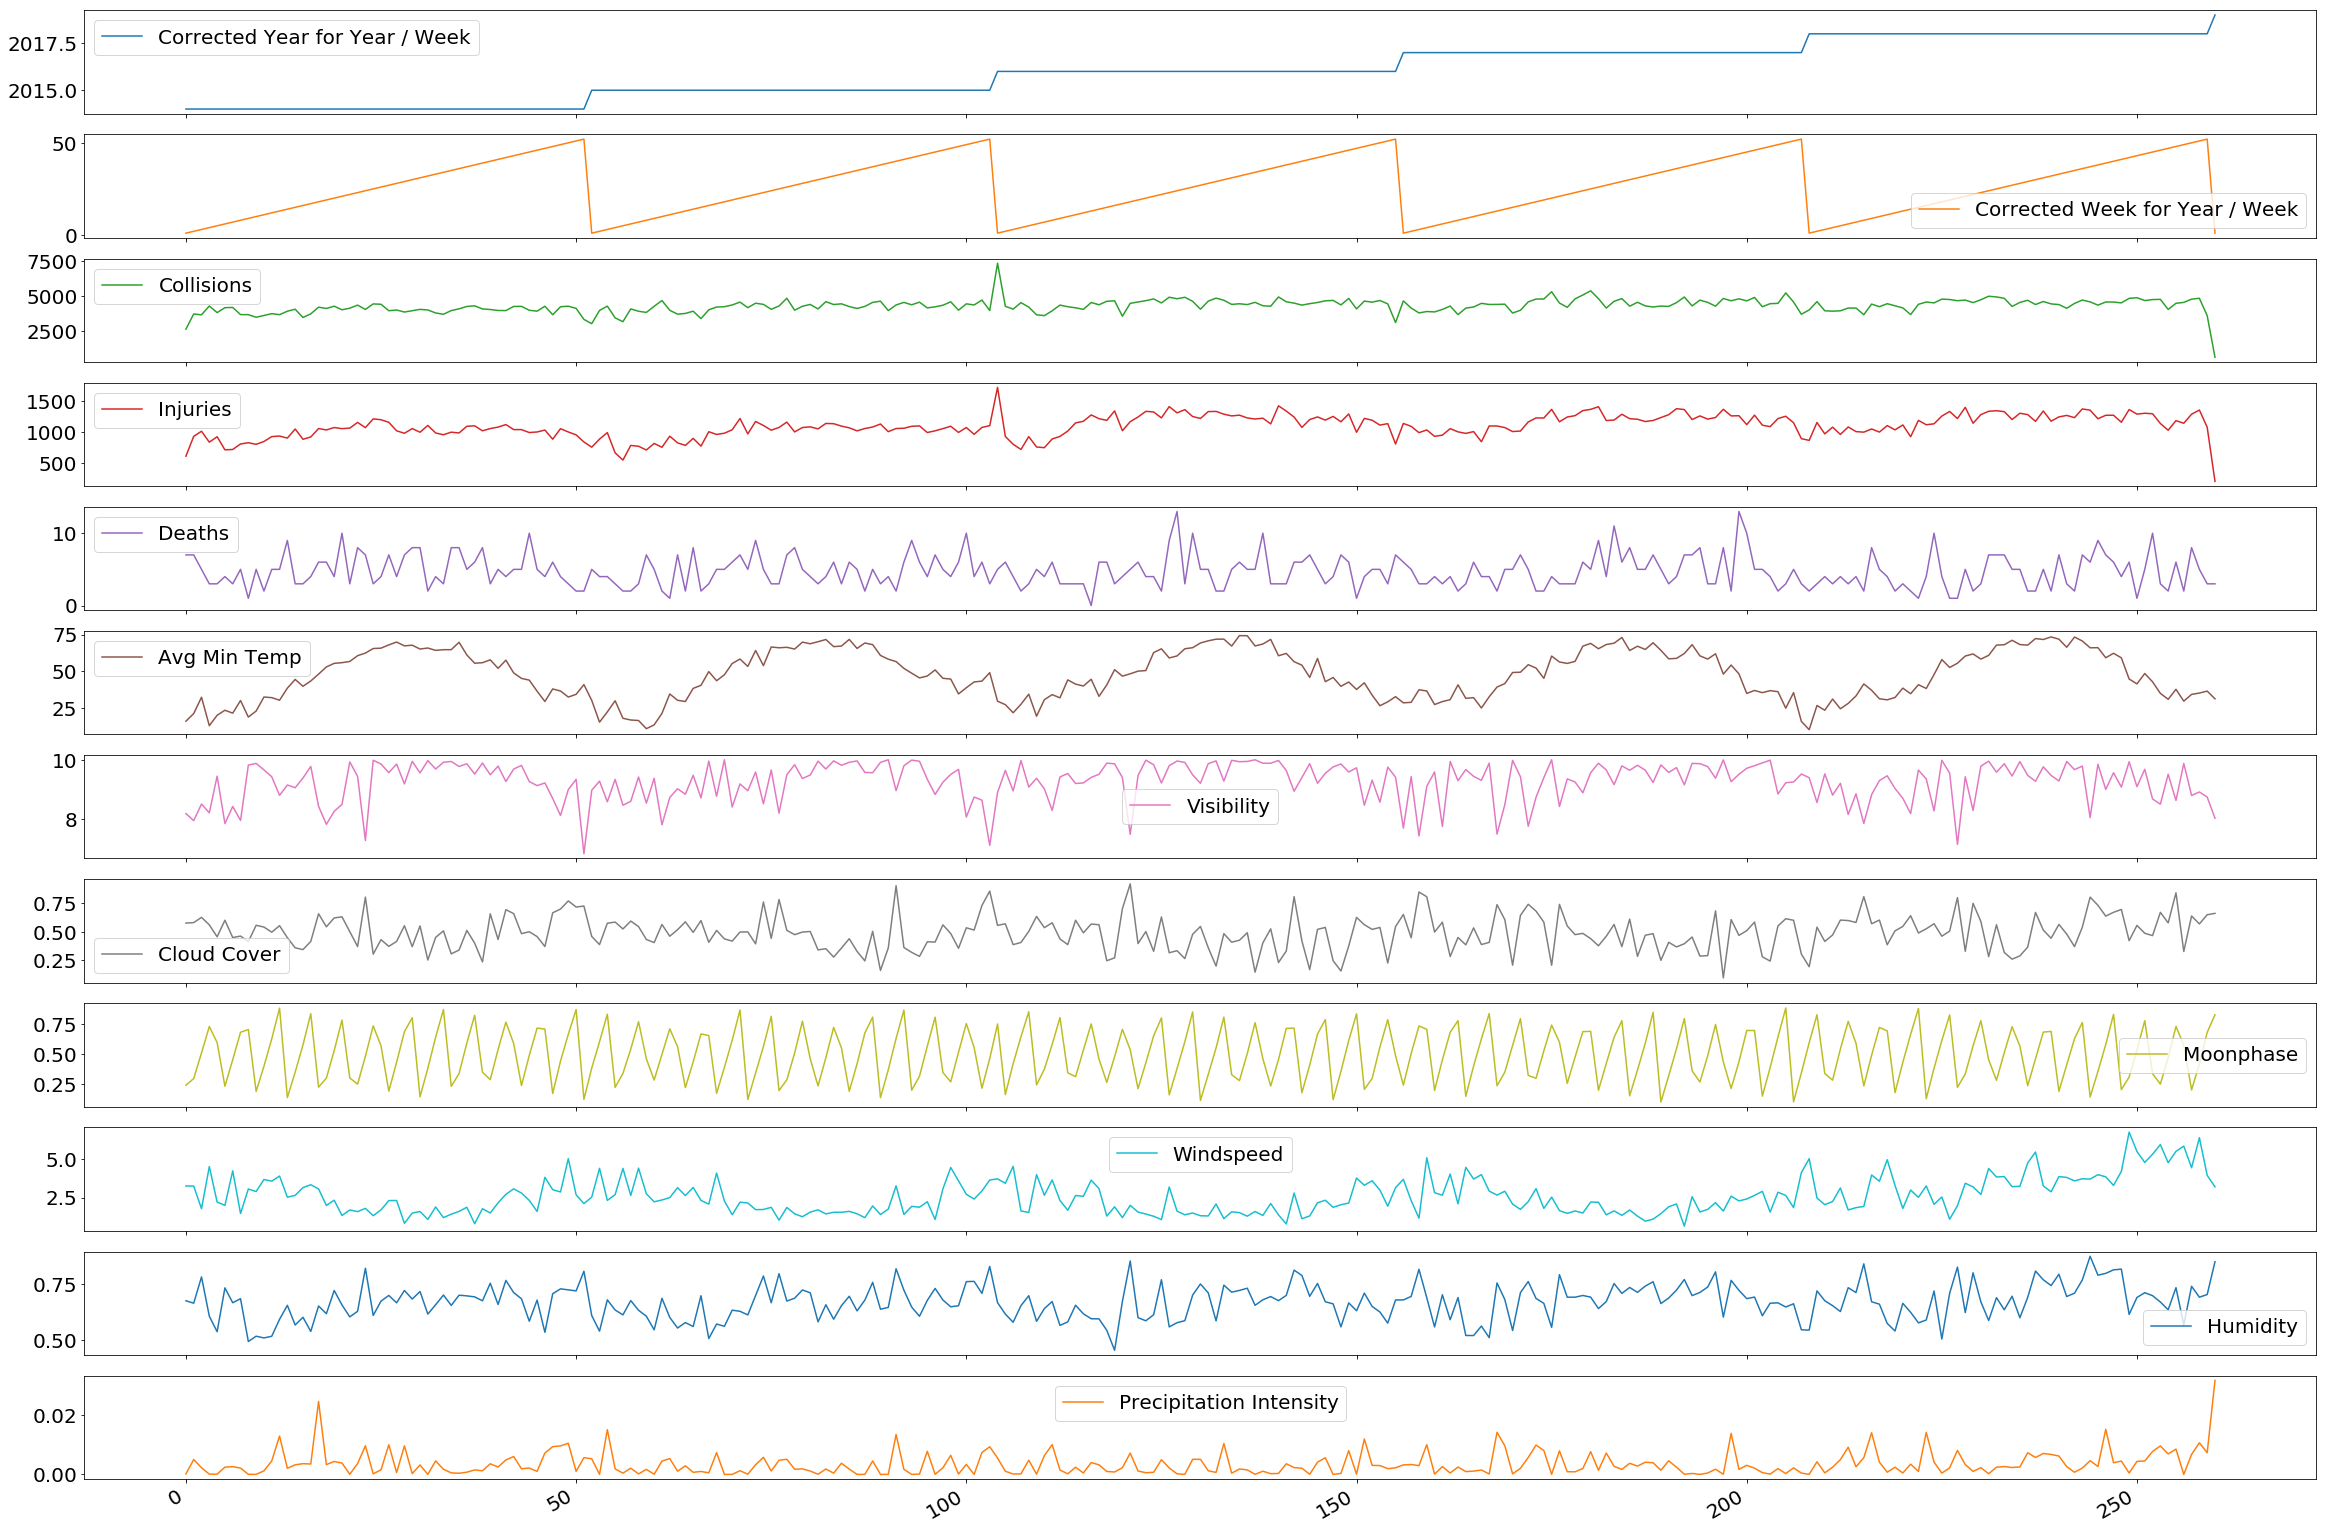

In [41]:
df.plot(subplots=True, figsize=(40, 30))

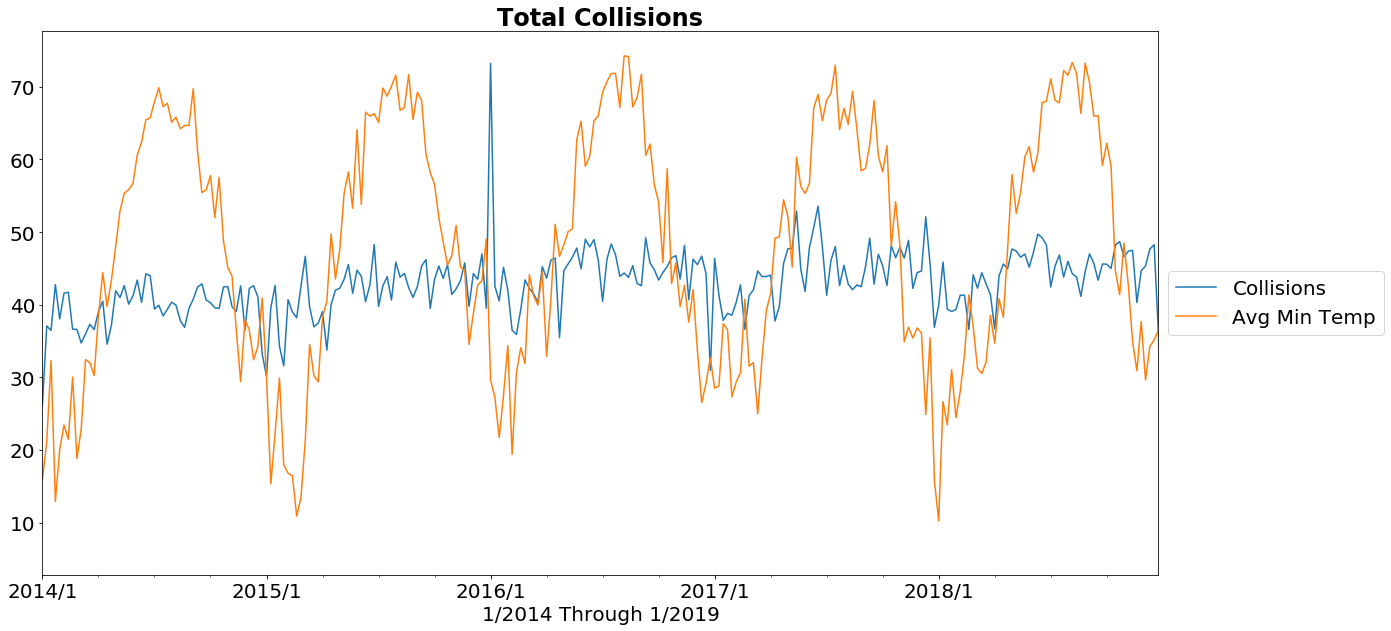

In [42]:
plt.plot(df['Year / Week'], df['Collisions']/100)
plt.plot(df['Year / Week'], df['Avg Min Temp'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(f'Total Collisions', fontweight="bold")
plt.xlabel('1/2014 Through 1/2019')
plt.ylabel('')
plt.ylim()
plt.xlim("2014/1" , "2018/52")
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(52))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(13))
#save figure
plt.savefig(os.path.join('..', 'images', 'mintemp-vs-deaths_daily.png'))
#show figure
plt.rcParams['figure.figsize'] = [20,10]
mpl.rcParams.update({'font.size': 20})
plt.show()

In [43]:
x = df['Avg Min Temp']
y = df['Injuries']
z = df['Collisions']
p = df['Deaths']

In [44]:
(slope, intercept, _, _, _) = linregress(x, y)
fit = slope * x + intercept

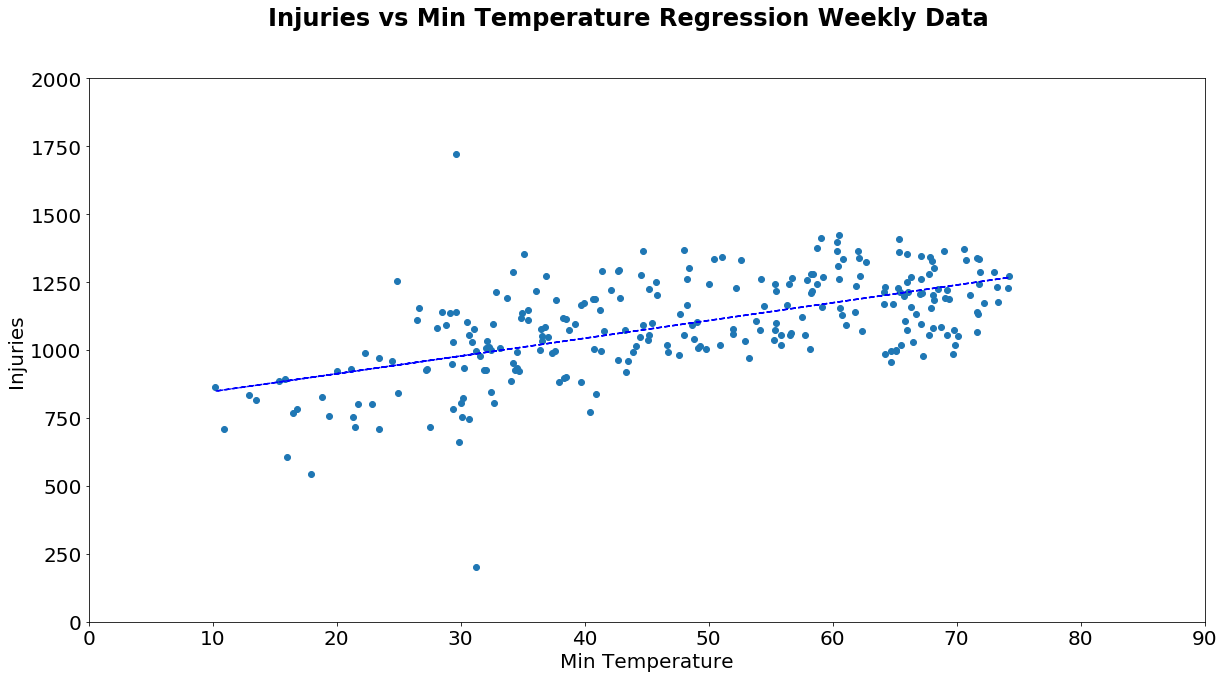

r-squared: 0.3463725349284649
p value: 1.0169193564761388e-25
Standard Error: 0.5575569394823334


In [45]:
fig, ax = plt.subplots()

mpl.rcParams.update({'font.size': 20})

fig.suptitle("Injuries vs Min Temperature Regression Weekly Data", fontsize=24, fontweight="bold")

ax.set_xlim(0, 90)
ax.set_ylim(0, 2000)

ax.set_xlabel("Min Temperature", fontsize=20)
ax.set_ylabel("Injuries", fontsize=20)

ax.plot(x, y, linewidth=0, marker='o')
ax.plot(x, fit, 'b--')

plt.savefig("../Images/Injuries vs Weekly Avg Min Temp")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)
print("p value:", p_value)
print("Standard Error:", std_err)

In [46]:
(slope, intercept, _, _, _) = linregress(x, z)
fit = slope * x + intercept

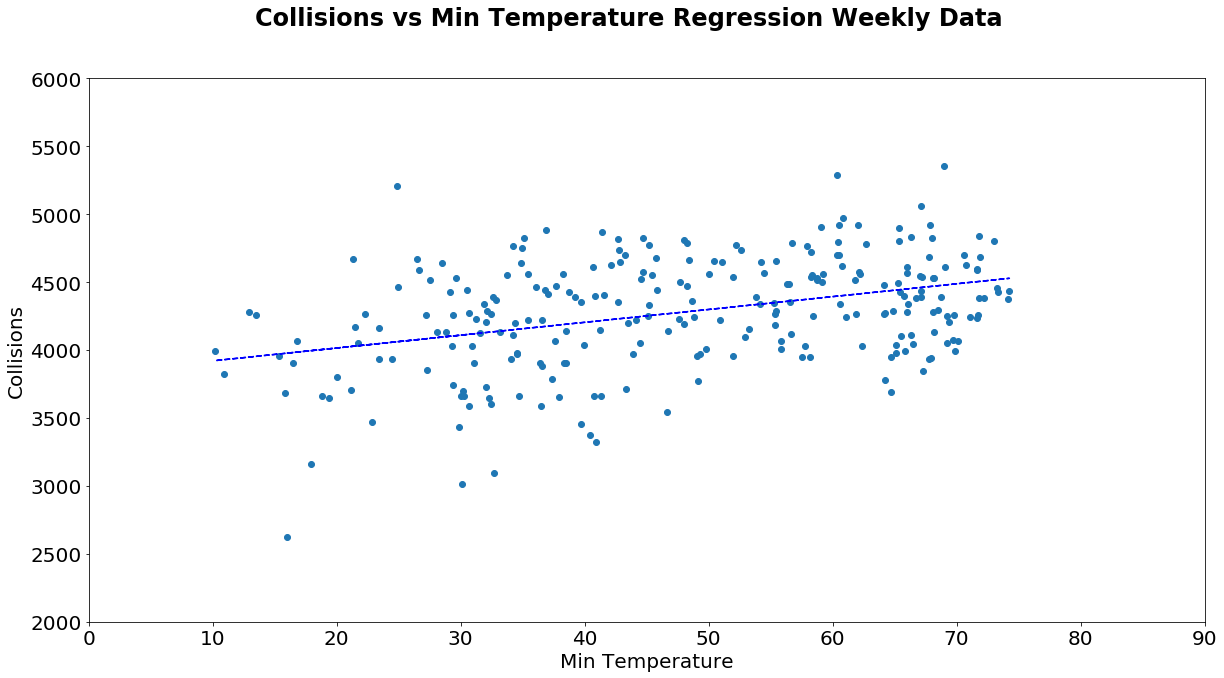

r-squared: 0.09673866784559608
p value: 2.921162241180816e-07
Standard Error: 1.794782002637963


In [47]:
fig, ax = plt.subplots()

mpl.rcParams.update({'font.size': 20})

fig.suptitle("Collisions vs Min Temperature Regression Weekly Data", fontsize=24, fontweight="bold")

ax.set_xlim(0, 90)
ax.set_ylim(2000, 6000)

ax.set_xlabel("Min Temperature", fontsize=20)
ax.set_ylabel("Collisions", fontsize=20)

ax.plot(x, z, linewidth=0, marker='o')
ax.plot(x, fit, 'b--')
plt.savefig("../Images/Collisions vs Weekly Avg Min Temp")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(x,z)
print("r-squared:", r_value**2)
print("p value:", p_value)
print("Standard Error:", std_err)

In [48]:
(slope, intercept, _, _, _) = linregress(x, p)
fit = slope * x + intercept

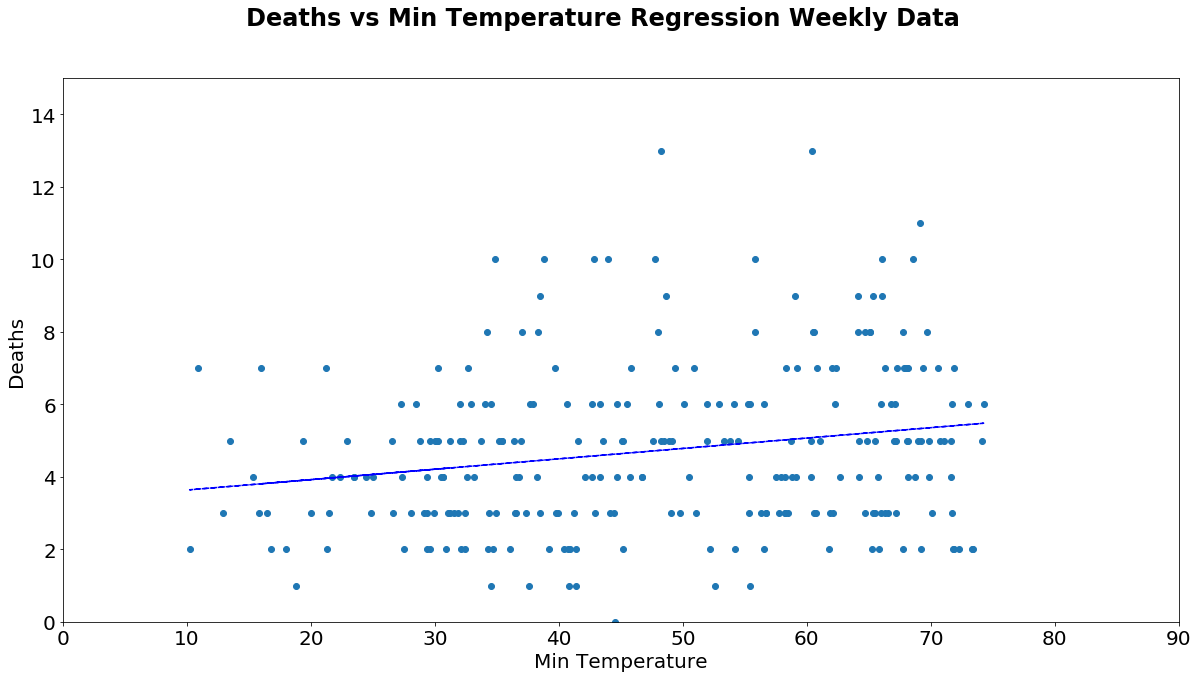

r-squared: 0.04312430757540839
p value: 0.0007363234810253796
Standard Error: 0.008394734890622197


In [49]:
fig, ax = plt.subplots()

mpl.rcParams.update({'font.size': 20})

fig.suptitle("Deaths vs Min Temperature Regression Weekly Data", fontsize=24, fontweight="bold")

ax.set_xlim(0, 90)
ax.set_ylim(0, 15)

ax.set_xlabel("Min Temperature")
ax.set_ylabel("Deaths")

ax.plot(x, p, linewidth=0, marker='o')
ax.plot(x, fit, 'b--')
plt.savefig("../Images/Collisions vs Weekly Avg Min Temp")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(x,p)
print("r-squared:", r_value**2)
print("p value:", p_value)
print("Standard Error:", std_err)

In [50]:
df.columns

Index(['Corrected Year for Year / Week', 'Corrected Week for Year / Week',
       'Collisions', 'Injuries', 'Deaths', 'Avg Min Temp', 'Visibility',
       'Cloud Cover', 'Moonphase', 'Windspeed', 'Humidity',
       'Precipitation Intensity', 'Year / Week'],
      dtype='object')

In [59]:
#df.drop(['Corrected Year for Year / Week', 'Corrected Week for Year / Week', 'Year / Week'], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001F5CCE10>,
      dtype=object)

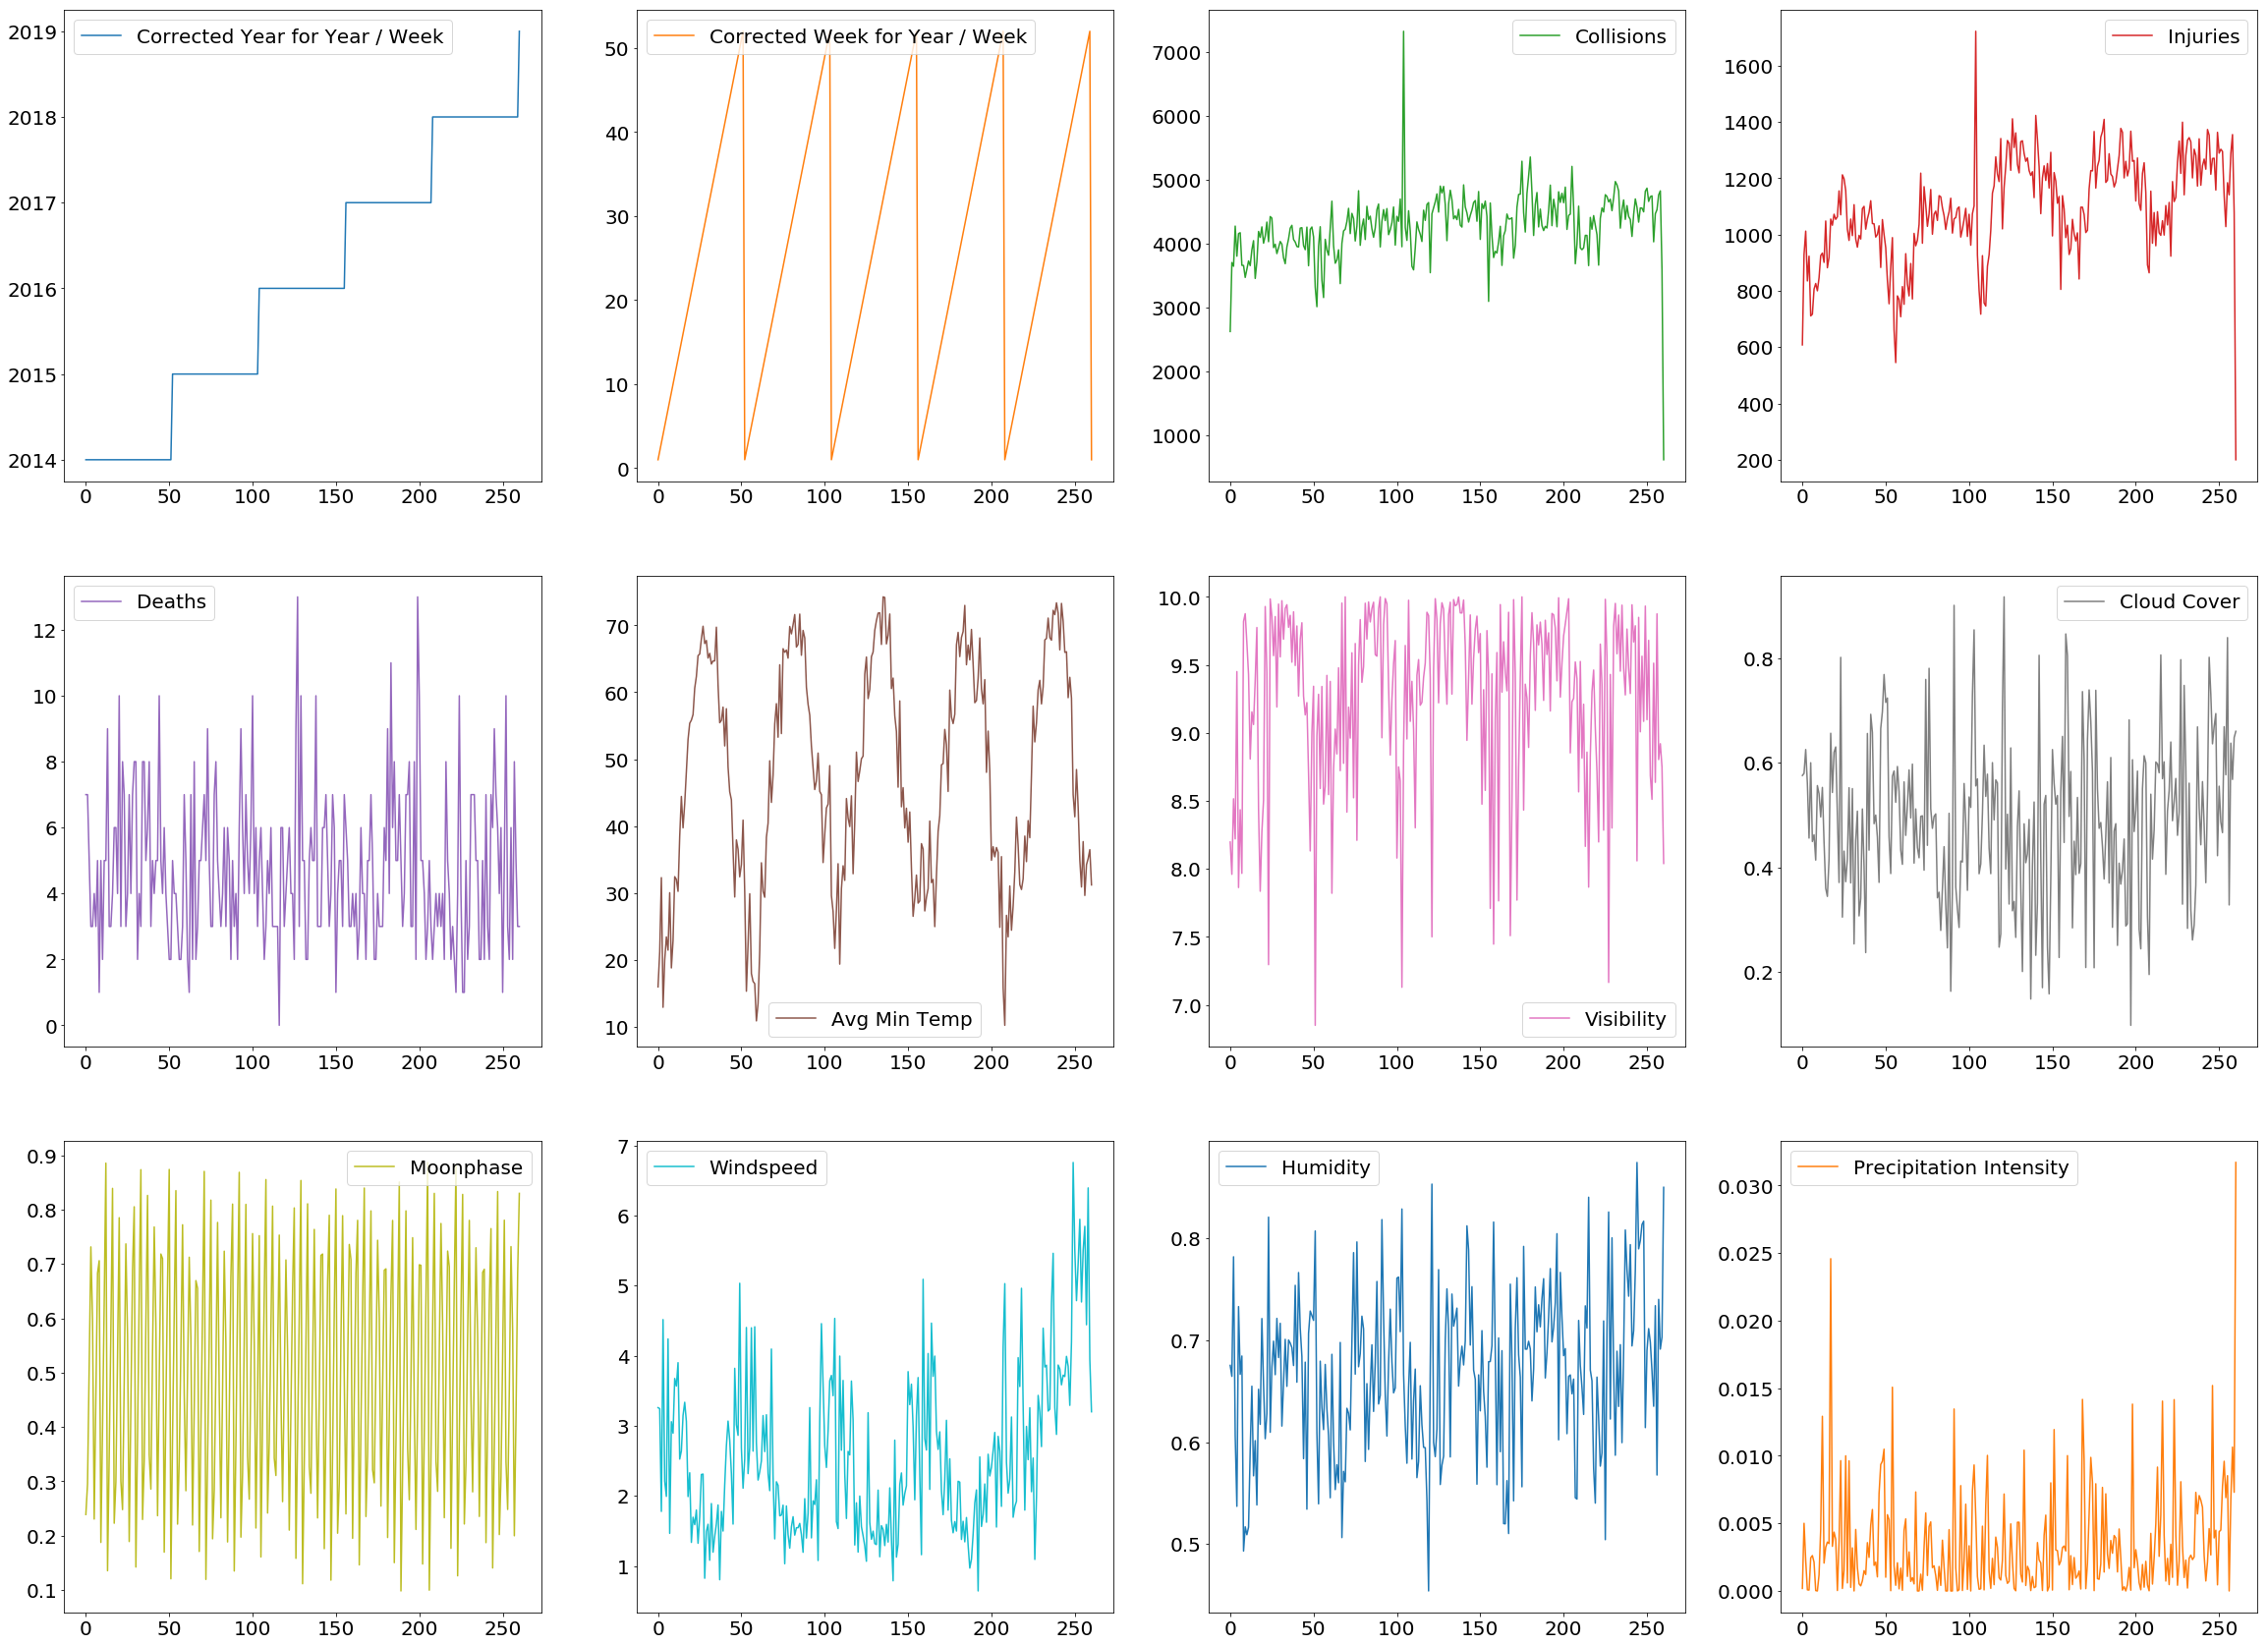

In [57]:
df.plot(subplots=True, layout=(3, 4), figsize=(40, 30), sharex=False)

In [58]:
# Reindex above on Year Week and remove Corrected Year / Week